## EDA and DV Exercise

In this exercise, you’ll explore a subset of the Craigslist car data. The goal is to understand the data: its structure, quality, and some patterns.

We’ll move step by step:
* Load and inspect the dataset
* Summarize key columns
* Visualize distributions
* Explore relationships between variables

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data Structure

In [2]:
# This will be different on your machine. You always have the option to 
# to make another copy in the folder of this repository.
listings = pd.read_csv("../631-eda-data-viz/car_listings.csv")

# Inspect structure
print(listings.shape)       # rows, columns
print(listings.dtypes)      # data types
listings.head()


(266817, 24)
url                   object
location              object
post_id                int64
time_posted           object
name                  object
make                  object
model                 object
year                 float64
odometer             float64
title                 object
paint                 object
drive                 object
cylinders             object
fuel                  object
type                  object
transmission          object
condition             object
vin                   object
price                float64
posting_body_text     object
title_text            object
num_images           float64
latitude             float64
longitude            float64
dtype: object


,url,location,post_id,time_posted,name,make,model,year,odometer,title,...,type,transmission,condition,vin,price,posting_body_text,title_text,num_images,latitude,longitude
0,https://fargo.craigslist.org/cto/d/west-fargo-...,fargo,7787882335,2024-09-25 09:35:39+00:00,chevy equinox lt awd,chevrolet,equinox,2013.0,160000.0,clean,...,SUV,automatic,NaN,NaN,6000.0,\n\nQR Code Link to This Post\n\n\n14 Equinox ...,14 Chevy Equinox,11.0,46.890700,-96.925800
1,https://chicago.craigslist.org/nwc/cto/d/des-p...,chicago,7789338453,2024-09-30 12:25:28+00:00,ford transit,ford,transit 250 van,2019.0,93000.0,clean,...,van,automatic,good,NaN,21900.0,\n\nQR Code Link to This Post\n\n\n2019 Ford C...,2019 FORD TRANSIT 250 VAN,14.0,42.023580,-87.902577
2,https://chicago.craigslist.org/nch/cto/d/evans...,chicago,7789384937,2024-09-30 14:33:58+00:00,ford escape titanium,ford,escape,2014.0,122000.0,clean,...,SUV,automatic,excellent,NaN,6250.0,\n\nQR Code Link to This Post\n\n\n2014 Ford E...,2014 Ford Escape (Excellent condition) Titaniu...,12.0,42.052098,-87.686005
3,https://chicago.craigslist.org/sox/cto/d/chica...,chicago,7789321782,2024-09-30 11:42:21+00:00,nissan altima 2.5 s,nissan,altima,2015.0,145000.0,clean,...,sedan,automatic,excellent,NaN,5200.0,\n\nQR Code Link to This Post\n\n\nHeres is my...,"2015 Nissan Altima S, 145k, *Remote Start*, 4 ...",11.0,41.781400,-87.770500
4,https://chicago.craigslist.org/nwi/cto/d/scher...,chicago,7789402919,2024-09-30 15:25:31+00:00,honda odyssey touring,honda,odyssey,2007.0,230000.0,clean,...,minivan,automatic,excellent,NaN,3500.0,\n\nQR Code Link to This Post\n\n\nVery Nice V...,2007 Honda Odyssey Touring,10.0,41.492200,-87.460500


In [3]:
# Basic summary: to_string is an easy way to see everything
print(listings.describe(include="all").to_string())


                                                                                                url location       post_id                time_posted        name    make   model           year      odometer   title   paint   drive    cylinders    fuel    type transmission condition                vin          price                                                                                                                                                                                                                                                                                                                                                                                                                                        posting_body_text    title_text     num_images       latitude      longitude
count                                                                                        266817   266817  2.668170e+05                     263017      262666  257869  243707  2626

In [4]:
# Check missingness
listings.isna().mean().sort_values(ascending=False)


vin                  0.861414
paint                0.274184
drive                0.255969
cylinders            0.222864
type                 0.180667
condition            0.175611
model                0.086614
price                0.041838
latitude             0.041508
longitude            0.041508
num_images           0.040706
make                 0.033536
odometer             0.015685
name                 0.015557
fuel                 0.015550
year                 0.015550
title                0.015542
transmission         0.015539
time_posted          0.014242
posting_body_text    0.014242
title_text           0.014242
location             0.000000
post_id              0.000000
url                  0.000000
dtype: float64

In [33]:
# Let's make things run faster by cutting down to just Minneapolis
listings = listings.query("location == 'minneapolis'")

### Summary Statistics

Play around with some summary statistics in the code cell below.

### Question

Which of the main numeric columns shows the biggest difference between the mean and median? What does that say about that data?

In [34]:
numeric_cols = listings.select_dtypes(include="number").columns

for column in numeric_cols : 
  if column not in ("post_id","num_images","latitude","longitude") : 
    col_mean = listings[column].mean()
    col_median = listings[column].median()
    diff = col_mean - col_median

    print(f"For {column} the difference is {diff:,.2f}")
    print(f"The relative difference is {diff/col_mean:.2f}")
    print("-"*20)



For year the difference is -0.66
The relative difference is -0.00
--------------------
For odometer the difference is 4,048.41
The relative difference is 0.03
--------------------
For price the difference is 3,455.25
The relative difference is 0.35
--------------------


I think relative difference is the way to look at this, so it's price!

### Bonus Question 

If you're ahead, feel free to take a crack at comparing the IQR to the width of two standard deviations for these columns.

In [35]:
def iqr(column) : 
  return column.quantile(0.75) - column.quantile(0.25)

def std_2(column) : 
  return column.std() * 2

functions = [iqr,std_2]

listings[["price","odometer","year"]].agg(functions)

,price,odometer,year
iqr,8550.000000,91542.000000,9.000000
std_2,21177.162481,322409.274858,12.517029


### Exploring Distributions

Make histograms of price, odometer, and year for F-150s. Once you've made the basic plots, add some filtering to restrict the data to where most of the listings are.

In [36]:
f150s = listings.loc[listings["model"]=="f150"]

(array([146., 157., 137., 140., 116., 112.,  81.,  87.,  82.,  41.,  43.,
         35.,  32.,  49.,  26.,  20.,  26.,  19.,  23.,  11.,  16.,  17.,
         10.,  20.,   8.,  11.,  12.,   7.,   8.,  11.,   4.,   6.,   3.,
          3.,   8.,   5.,   5.,   3.,   7.,   3.,   2.,   1.,   7.,   1.,
          1.,   5.,   2.,   2.,   1.,   4.]),
 array([ 2000.  ,  2959.98,  3919.96,  4879.94,  5839.92,  6799.9 ,
         7759.88,  8719.86,  9679.84, 10639.82, 11599.8 , 12559.78,
        13519.76, 14479.74, 15439.72, 16399.7 , 17359.68, 18319.66,
        19279.64, 20239.62, 21199.6 , 22159.58, 23119.56, 24079.54,
        25039.52, 25999.5 , 26959.48, 27919.46, 28879.44, 29839.42,
        30799.4 , 31759.38, 32719.36, 33679.34, 34639.32, 35599.3 ,
        36559.28, 37519.26, 38479.24, 39439.22, 40399.2 , 41359.18,
        42319.16, 43279.14, 44239.12, 45199.1 , 46159.08, 47119.06,
        48079.04, 49039.02, 49999.  ]),
 <BarContainer object of 50 artists>)

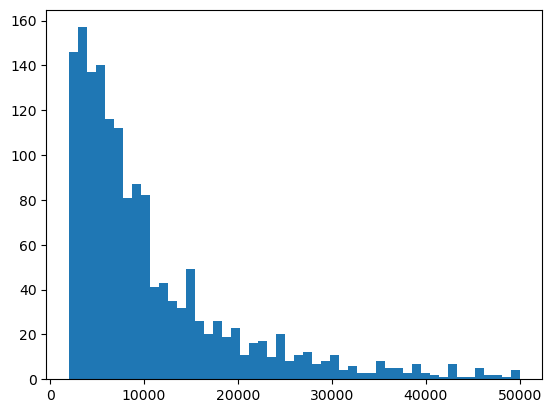

In [46]:
#plt.hist(f150s["price"])
plt.hist(f150s.loc[f150s["price"].between(2000,50000)]["price"],bins=50)

(array([ 10.,  10.,   9.,  12.,   9.,  15.,  17.,   7.,  15.,  20.,   9.,
         13.,  22.,  26.,  37.,  35.,  33.,  35.,  31.,  43.,  32.,  40.,
         62.,  54., 100.,  86.,  63.,  59.,  58.,  82.,  72.,  84.,  71.,
         73.,  51.,  42.,  47.,  40.,  36.,  15.,  18.,  43.,   9.,  22.,
         14.,  21.,  11.,   7.,   4.,   6.]),
 array([  1000.,   6940.,  12880.,  18820.,  24760.,  30700.,  36640.,
         42580.,  48520.,  54460.,  60400.,  66340.,  72280.,  78220.,
         84160.,  90100.,  96040., 101980., 107920., 113860., 119800.,
        125740., 131680., 137620., 143560., 149500., 155440., 161380.,
        167320., 173260., 179200., 185140., 191080., 197020., 202960.,
        208900., 214840., 220780., 226720., 232660., 238600., 244540.,
        250480., 256420., 262360., 268300., 274240., 280180., 286120.,
        292060., 298000.]),
 <BarContainer object of 50 artists>)

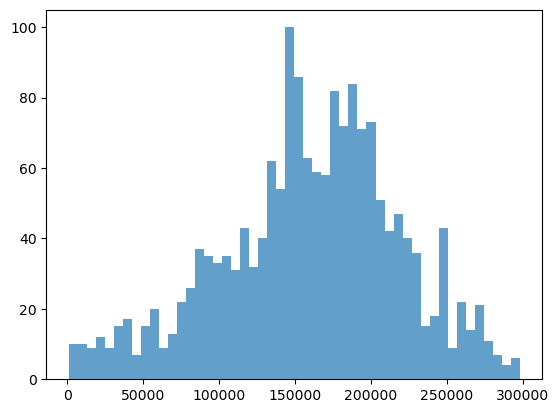

In [47]:
#plt.hist(f150s["odometer"])
plt.hist(f150s.loc[f150s["odometer"] < 300000]["odometer"],bins=50,alpha=0.7)


(array([ 32.,  51.,  75., 160., 259., 223., 542., 214., 142.,  54.]),
 array([1990. , 1993.3, 1996.6, 1999.9, 2003.2, 2006.5, 2009.8, 2013.1,
        2016.4, 2019.7, 2023. ]),
 <BarContainer object of 10 artists>)

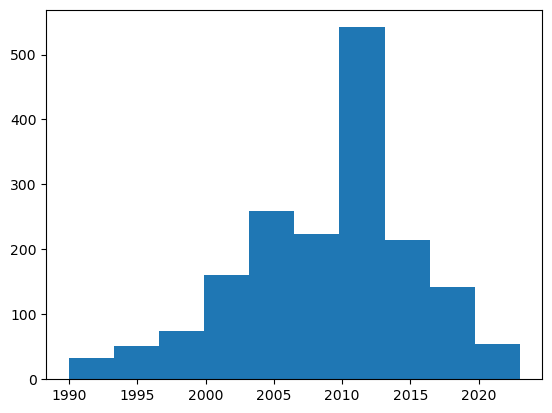

In [40]:
plt.hist(f150s["year"])

### Exploring Relationships

In this section, build some scatterplots of price vs year and price vs odometer for the F150s. I'm also going to include code to make a scatterplot of year vs model for some of the most popular models.


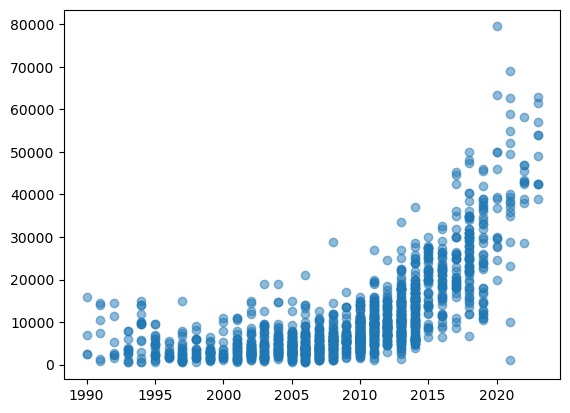

In [49]:
plt.scatter(f150s["year"],f150s["price"],alpha=0.5)

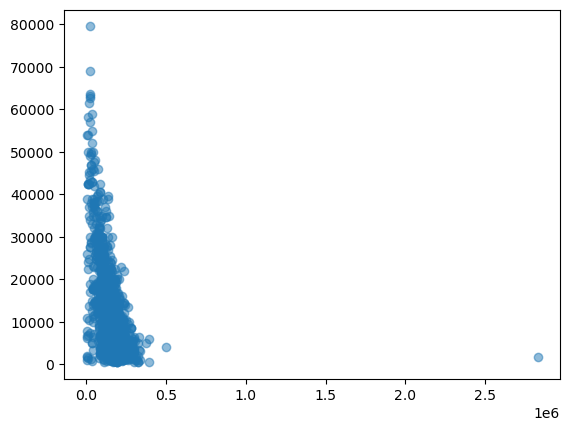

In [ ]:
plt.scatter(f150s["odometer"],f150s["price"],alpha=0.5)
# Not too helpful with that million miler

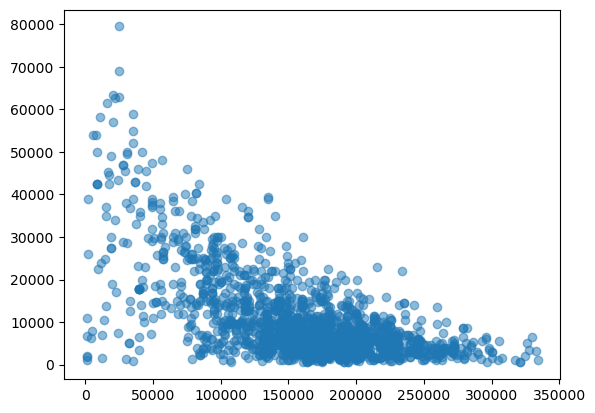

In [51]:
plot_data = f150s.query("odometer < 350000")
plt.scatter(plot_data["odometer"],plot_data["price"],alpha=0.5)


Making a **mosaicplot** is non-trivial, but it's a cool trick to know.

In [61]:
import matplotlib.patches as patches

def mosaic_plot(data, x_var, y_var, figsize=(12, 8)):
    ct = pd.crosstab(data[y_var], data[x_var])
    col_totals = ct.sum(axis=0)
    col_props = col_totals / col_totals.sum()
    ct_prop = ct.div(col_totals, axis=1).fillna(0)
    
    fig, ax = plt.subplots(figsize=figsize)
    colors = plt.cm.Set3(np.linspace(0, 1, len(ct.index)))
    
    x_start = 0
    for col_idx, col in enumerate(ct.columns):
        col_width = col_props[col]
        
        y_start = 0
        for row_idx, row in enumerate(ct.index):
            row_height = ct_prop.loc[row, col]
            
            if row_height > 0:
                rect = patches.Rectangle(
                    (x_start, y_start), col_width, row_height,
                    facecolor=colors[row_idx], 
                    edgecolor='white', 
                    linewidth=1.5,
                    alpha=0.8
                )
                ax.add_patch(rect)
                y_start += row_height
        
        # Only show column labels, no individual cell counts
        ax.text(x_start + col_width/2, -0.03, 
               f'{col}\n({col_totals[col]})', 
               ha='center', va='top', fontsize=9, fontweight='bold')
        
        x_start += col_width
    
    # Clean formatting
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.08, 1)
    ax.set_xlabel(x_var, fontsize=12, fontweight='bold')
    ax.set_ylabel(y_var, fontsize=12, fontweight='bold')
    ax.set_title(f'Mosaic Plot: {y_var} by {x_var}', fontsize=14, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Legend with row totals
    row_totals = ct.sum(axis=1)
    legend_elements = [
        patches.Patch(facecolor=colors[i], label=f'{row} ({row_totals[row]})', alpha=0.8) 
        for i, row in enumerate(ct.index)
    ]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    return fig, ax

In [63]:
models_for_plot = ["f150","camry","silverado","accord","impala","civic","rav4"]
plot_data = listings.loc[listings["model"].isin(models_for_plot)]
plot_data = plot_data.loc[plot_data["year"].between(2005,2015)]


In [64]:
# Nice to have the model counts sorted
model_counts = plot_data["model"].value_counts()
sorted_models = model_counts.index.tolist()  # This gives you models in descending order

plot_data["model"] = pd.Categorical(plot_data["model"], categories=sorted_models, ordered=True)

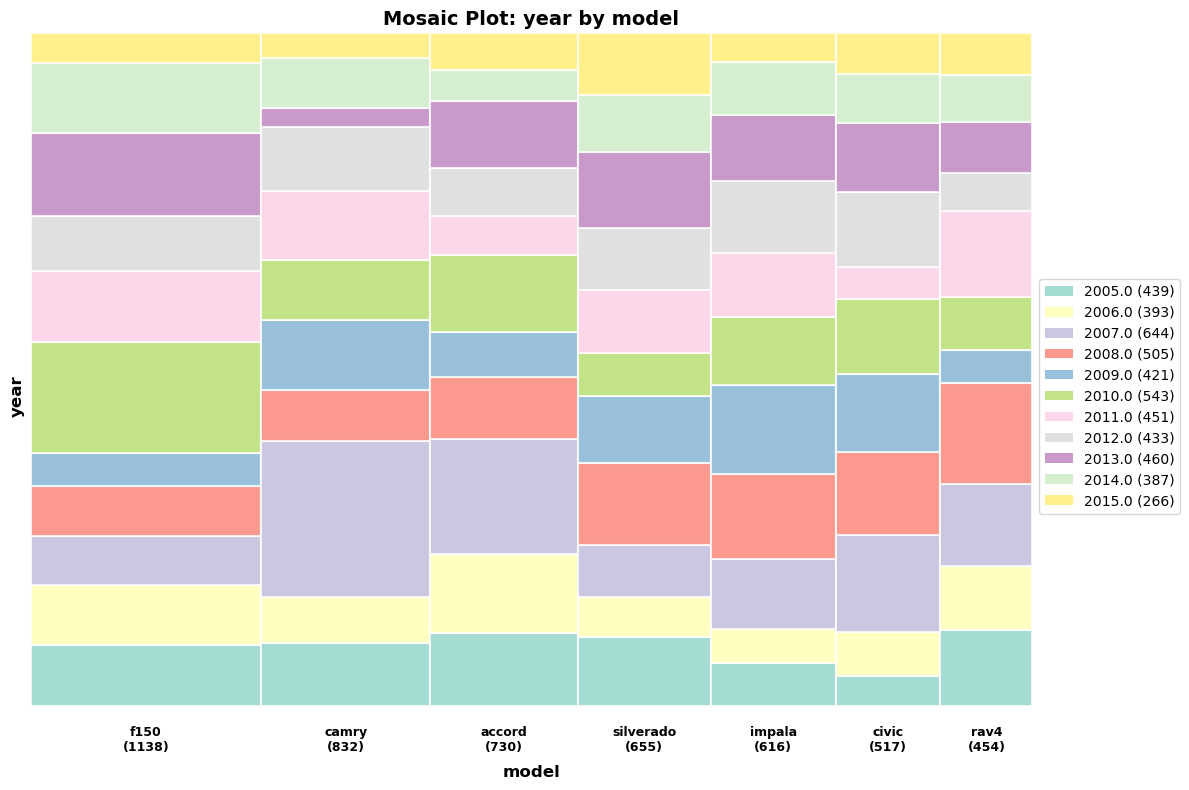

In [65]:
fig, ax = mosaic_plot(plot_data,"model","year")
plt.show()